In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import numpy as np
import pandas as pd

from disCap import disCap
from disCap import stockData

investments = stockData.investments
stock_description = stockData.stock_description

# cryptocurrencies are not available in Yahoo.  Manually add.
specialvalues = {'eth':1380, 'btc': 34631}

investments_df = disCap.investmentsAs_df(investments, specialvalues)
stockDescription_df = disCap.stockDescriptionAs_df(stock_description)

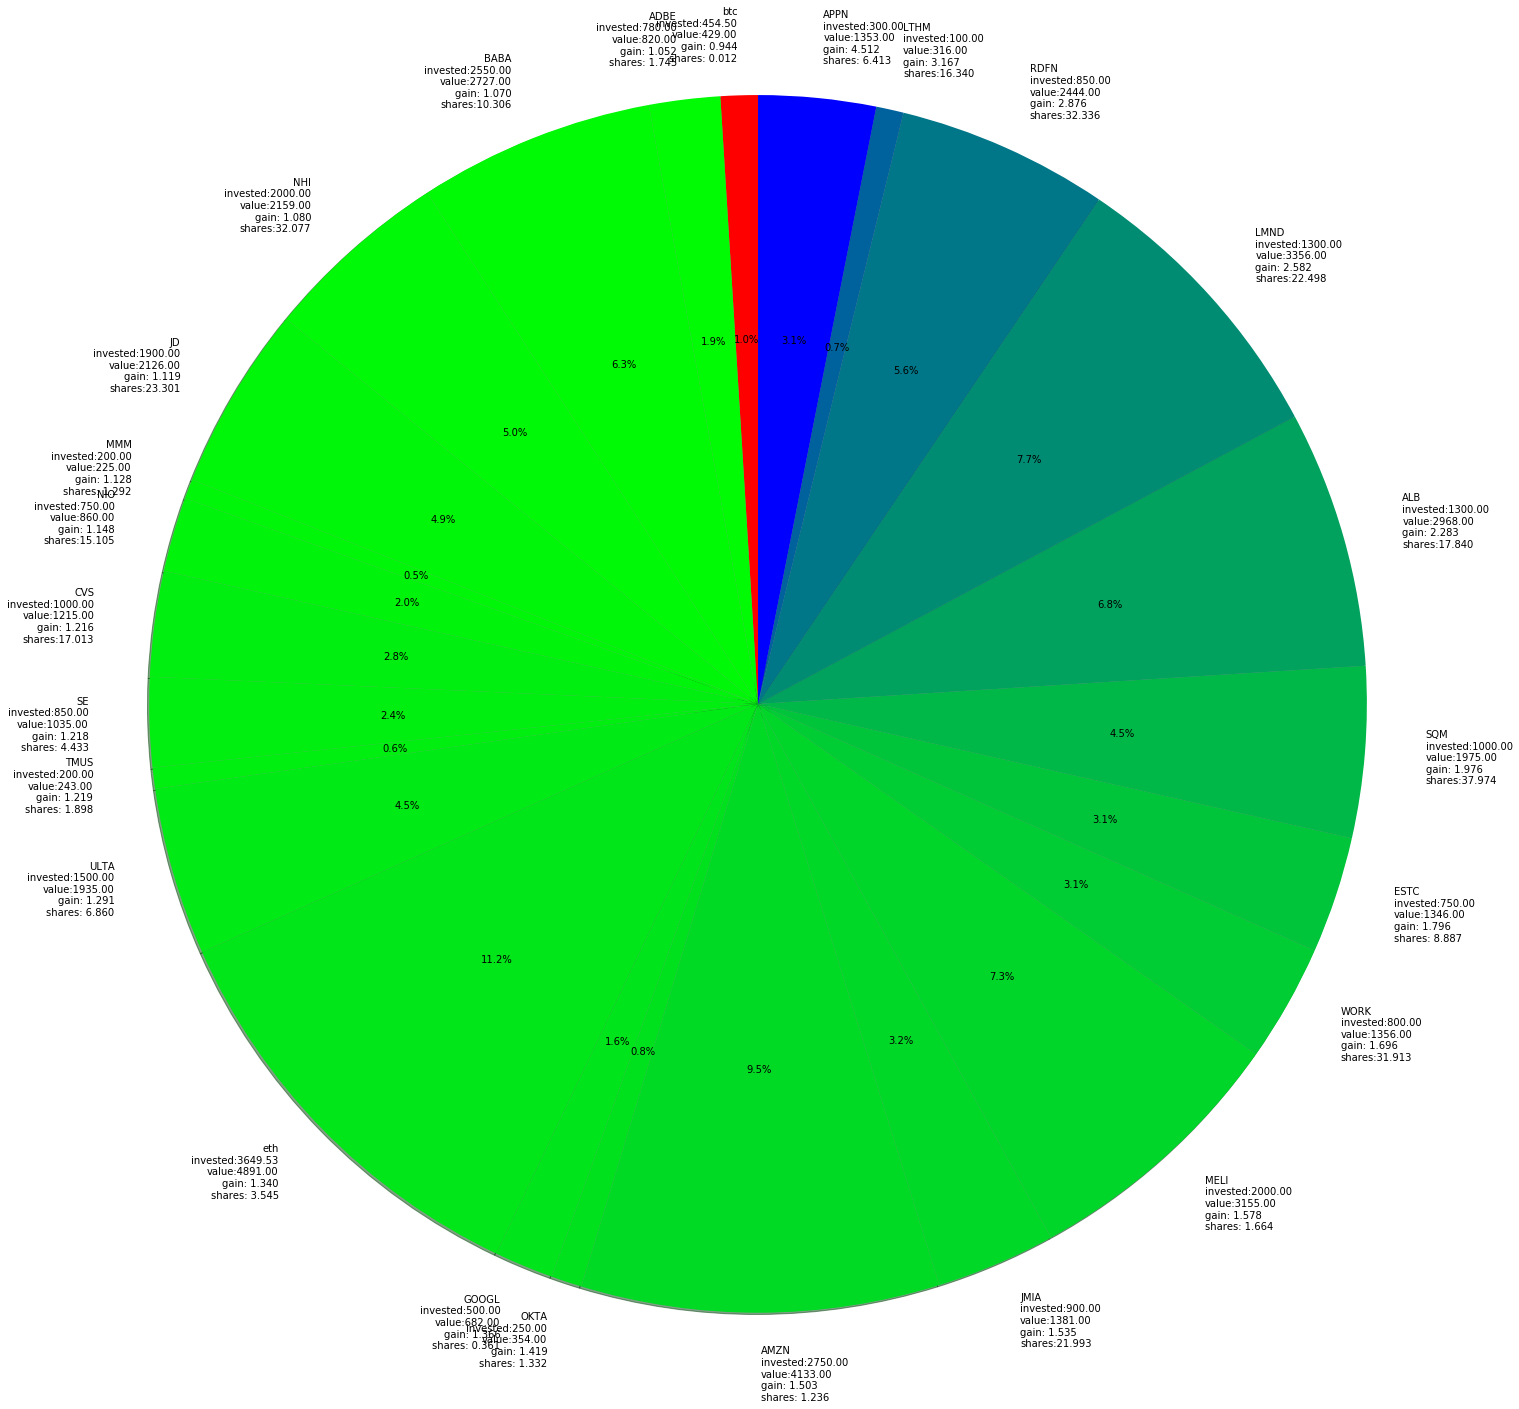



Total Invested:		28634.03
Total Value:		43498.91
Total Gain %:		  1.52


In [8]:
# make a Pie chart.
# data is sorted by gain per stock
# color from minimum to 1.0 red to yellow
# color from 1.00 to max green to blue

df, total_invested, total_value = disCap.todayValueAs_df(investments_df)

fig1, ax1 = plt.subplots()
df = df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(df.gain), 0.95)
blue_point = max( max(df.gain), 3)
green_point = 1.00
label_ = list( map( disCap.mklab, df.symbol, df.invested, df.value, df.gain, df.shares) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

print('\n\nTotal Invested:\t\t{0:6.2f}\nTotal Value:\t\t{1:6.2f}\nTotal Gain %:\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))

In [9]:
fields = ['symbol','gain','invested','value','shares','percentage_value','close','effective_share_price']
df['percentage_value'] = df['percentage_value'] * 100.00
df[fields].head(30)

,symbol,gain,invested,value,shares,percentage_value,close,effective_share_price
23,btc,0.944315,454.50,429.191333,0.012393,0.986672,34631.00,36673.129852
0,ADBE,1.051601,780.00,820.248700,1.745210,1.885677,470.00,446.937618
4,BABA,1.069720,2550.00,2727.786617,10.305590,6.270932,264.69,247.438526
14,NHI,1.079711,2000.00,2159.422967,32.076990,4.964316,67.32,62.349990
8,JD,1.119307,1900.00,2126.684095,23.301020,4.889052,91.27,81.541495
13,MMM,1.128414,200.00,225.682701,1.291830,0.518824,174.70,154.819133
15,NIO,1.147812,750.00,860.859026,15.105440,1.979036,56.99,49.650987
5,CVS,1.215720,1000.00,1215.719681,17.012590,2.794828,71.46,58.779998
18,SE,1.218021,850.00,1035.317890,4.433340,2.380101,233.53,191.729035
20,TMUS,1.218834,200.00,243.766844,1.898200,0.560398,128.42,105.362975


In [ ]:
df = df.sort_values(by=['last_investment'])
fields = ['symbol','gain','invested','value','shares','percentage_value','close',
          'effective_share_price','last_investment']
df[fields].head(30)

In [ ]:
dfx = df.merge( stockDescription_df, on='symbol',how='left')

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = area_df['value']/total

In [ ]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])

label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
# make time charts
showeach = 5
duration = '180d'
window = 5
symbol = 'SE'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
# make time charts
showeach = 7
duration = '180d'
window = 3
symbol = 'NIO'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
# make time charts
showeach = 7
duration = '180d'
window = 3
symbol = 'MELI'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)